# Project: Predicting Titanic Survival Using Logistic Regression

## Analysis Objective

The purpose of this data analysis report is to conduct a logistic regression analysis on the survival status of Titanic passengers based on attributes such as gender and cabin class, thereby enabling the use of the obtained model to predict whether passengers with unknown survival status survived the sinking event according to their attributes.

## Introduction

The RMS Titanic was an Olympic-class cruise ship that sank after hitting an iceberg during its maiden voyage in April 1912. The Titanic was the second of three superliners of its class, alongside its sister ships Olympic and Britannic, which provided transatlantic travel services for passengers of the White Star Line.


The Titanic was built by the Harland and Wolff shipyard in Belfast, Northern Ireland. At the time, it was the largest passenger steamship, with a scale comparable to a modern aircraft carrier, earning it the nickname 'the unsinkable ship of God.' During its maiden voyage, the Titanic departed from Southampton, England, with stops in Cherbourg-Octeville, France, and Queenstown, Ireland, en route to New York City, United States, across the Atlantic Ocean. However, due to human error, it struck an iceberg at 11:40 PM ship time on April 14, 1912; 2 hours and 40 minutes later, at 2:20 AM on April 15, the ship split in two and sank into the Atlantic Ocean, resulting in over 1,500 deaths. This event is regarded as the worst maritime disaster of the 20th century and one of the most well-known maritime disasters in history.


The dataset includes two data tables: `titanic_train.csv` and `titanic_test.csv`. `titanic_train.csv` records the survival status of over eight hundred Titanic passengers following the sinking incident, along with relevant passenger information such as cabin class, gender, age, number of accompanying spouses/children, number of accompanying parents/children, etc. `titanic_test.csv` contains only the relevant information of passengers (who are not included in `titanic_train.csv`), and this file can be used to predict whether passengers survived.

The meaning of each column in `titanic_train.csv` is as follows:

- PassengerId: Passenger ID

- survival: Survival status

  0: Not survived

  1: Survived

- pclass: Cabin class

  1: First class

  2: Second class

  3: Third class

- sex: Gender

- Age: Age

- sibsp: Number of siblings/spouses aboard

- parch: Number of parents/children aboard

- ticket: Ticket number

- fare: Fare amount

- cabin: Cabin number

- embarked: Port of embarkation

  C: Cherbourg

  Q: Queenstown

  S: Southampton

The column meanings in `titanic_test.csv` are the same as above, but it does not contain the survival variable, i.e., survival status.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [2]:
original_titanic_train = pd.read_csv("titanic_train.csv")
original_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data assessment and cleaning

### Data tidiness

In [3]:
cleaned_titanic_train = original_titanic_train.copy()

In [4]:
cleaned_titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the first 10 rows of data, the data conforms to the structure of 'each variable as a column, each observation as a row, and each type of observation unit as a table', therefore there is no structural issue.

### Data Cleanliness

In [5]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the output results, cleaned_titanic_train contains 891 observations, among which Age, Cabin, and Embarked have missing values that will be evaluated and cleaned in subsequent steps. Regarding data types, PassengerId represents passenger ID, whose data type should not be numeric but string, thus requiring data format conversion. Additionally, we know that Survived (survival status), Pclass (cabin class), Sex (gender), and Embarked (port of embarkation) are all categorical data, so their data types can be converted to Category.

In [6]:
cleaned_titanic_train["PassengerId"]=cleaned_titanic_train["PassengerId"].astype("str")

In [7]:
cleaned_titanic_train["Survived"]=cleaned_titanic_train["Survived"].astype("category")
cleaned_titanic_train["Pclass"]=cleaned_titanic_train["Pclass"].astype("category")
cleaned_titanic_train["Sex"]=cleaned_titanic_train["Sex"].astype("category")
cleaned_titanic_train["Embarked"]=cleaned_titanic_train["Embarked"].astype("category")

In [8]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


#### Handling Missing Data

From the output of the `info` method, it can be seen that the variables `Age`, `Cabin`, and `Embarked` contain missing values in `cleaned_titanic_train`.

In [9]:
cleaned_titanic_train[cleaned_titanic_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


There are 177 missing values in the age variable, accounting for approximately 20% of the total dataset. Since the number of these observations is substantial and the other variables in these rows still hold value for analysis, it is advisable to retain these rows. However, as the logistic regression function Logit that will be used later does not allow missing values in the dataset, the missing values are imputed using the mean age of the passengers.

In [10]:
average_age = cleaned_titanic_train['Age'].mean()
cleaned_titanic_train['Age'] = cleaned_titanic_train['Age'].fillna(average_age)
cleaned_titanic_train['Age'].isna().sum()

np.int64(0)

In [11]:
cleaned_titanic_train[cleaned_titanic_train['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


There are 687 missing values in the cabin number variable, indicating that cabin number data is unknown for most observations, so these observations cannot be deleted. Furthermore, we consider that cabin number is not a key factor affecting survival probability and will not be included as an independent variable in the logistic regression. Even with missing values, it will not affect model building, so these observations can be retained.

In [12]:
cleaned_titanic_train[cleaned_titanic_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Only two observations have missing values for the embarkation port variable. However, we consider the embarkation port to be not a key factor influencing survival probability and thus will not include it as an independent variable in the logistic regression. Even with missing values, it will not affect model construction, so these observations can be retained.

#### Handling duplicate data

Based on the meaning and content of the data variables, PassengerId is a unique identifier for passengers and should not have duplicates. Therefore, check if there are any duplicate values.

In [13]:
cleaned_titanic_train["PassengerId"].duplicated().sum()

np.int64(0)

The output result is 0, indicating that there are no duplicate values.

#### Processing inconsistent data

Inconsistent data may exist in all categorical variables, and we need to check if different values actually refer to the same target.

In [14]:
cleaned_titanic_train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
cleaned_titanic_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
cleaned_titanic_train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
cleaned_titanic_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

From the above output results, there is no inconsistent data.

#### Processing invalid or erroneous data

A quick understanding of numerical statistical information can be obtained through the describe method of DataFrame.

In [18]:
cleaned_titanic_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


The average age of passengers is approximately 30 years, with a maximum age of 80 years and a minimum age of 0.42 years. The maximum number of co-traveling companions/siblings is 8, and the minimum is 0. The maximum number of co-traveling parents/children is 6, and the minimum is 0. The average price of ship tickets is 32 yuan, with a maximum price of 512 yuan and a minimum price of 0 yuan, where 0 yuan is conjectured to represent a free ticket. There are no unrealistic values in the data.

## Organize data

Data organization is closely related to the direction of analysis. The goal of this data analysis is to predict the survival probability after the sinking of the Titanic based on relevant information about the passengers. The data variables include the number of traveling companions/siblings and the number of traveling parents/children, which can help calculate the number of family members on board. We are interested in whether the number of traveling family members will have a significant impact on survival, so a new variable can be created to record this value.

In [19]:
cleaned_titanic_train['FamilyNum'] = cleaned_titanic_train['SibSp'] + cleaned_titanic_train['Parch']
cleaned_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Exploring data

Before proceeding with logistic regression analysis, we can first utilize data visualization to explore the distribution of numerical variables and variables correlated with passenger survival status, thereby providing direction for subsequent in-depth analysis.

In [20]:
sns.set_palette("pastel")

In [21]:
# 设置图表尺寸
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

### Survival proportion

In [22]:
survived_counts=cleaned_titanic_train["Survived"].value_counts()
survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

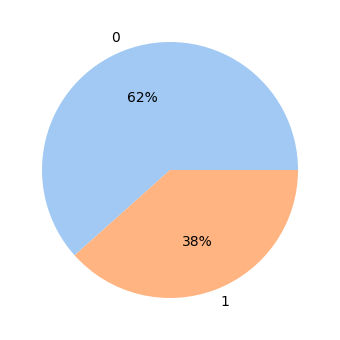

In [23]:
plt.pie(survived_counts,autopct="%.0f%%",labels=survived_counts.index)
plt.show()

From the above pie chart, it can be seen that the number of passengers who perished on the Titanic was greater than the number of survivors, with a ratio of approximately 3:2.

### Passenger Age

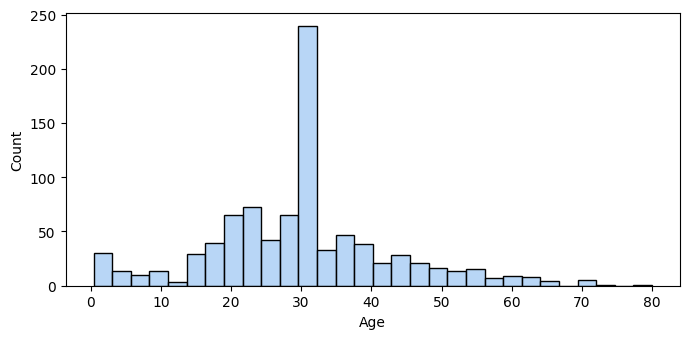

In [24]:
sns.histplot(cleaned_titanic_train,x="Age")
plt.show()

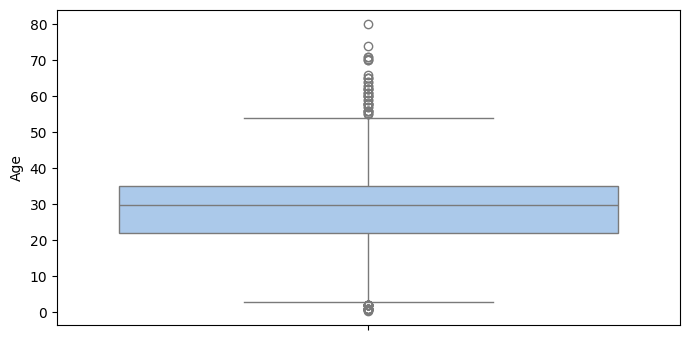

In [25]:
sns.boxplot(cleaned_titanic_train, y='Age')
plt.show()

The majority of passengers are aged between 20 and 40, but there are also a significant number of elderly passengers and infants.

### Passenger Age and Survival Status

<Axes: xlabel='Age', ylabel='Count'>

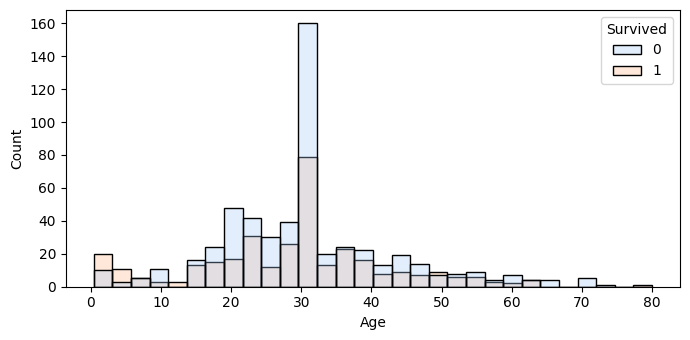

In [26]:
sns.histplot(cleaned_titanic_train,x="Age",hue='Survived',alpha=0.3)

From the histogram of passenger ages, only the infant group had a relatively high survival rate, while the majority of other age groups had more fatalities than survivors.

### Cabin Class and Survival Status

In [27]:
survived_counts_c1=cleaned_titanic_train.query("Pclass==1")["Survived"].value_counts()
survived_counts_c1

Survived
1    136
0     80
Name: count, dtype: int64

In [28]:
survived_counts_c2=cleaned_titanic_train.query("Pclass==2")["Survived"].value_counts()
survived_counts_c2

Survived
0    97
1    87
Name: count, dtype: int64

In [29]:
survived_counts_c3=cleaned_titanic_train.query("Pclass==3")["Survived"].value_counts()
survived_counts_c3

Survived
0    372
1    119
Name: count, dtype: int64

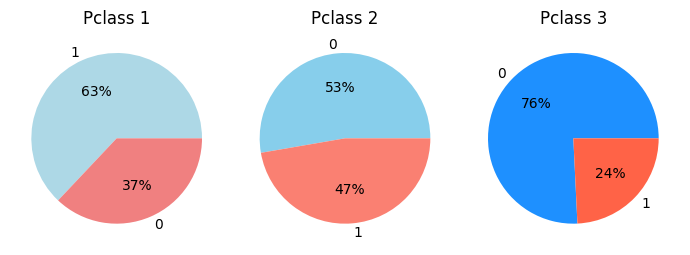

In [30]:
colors1 = ['lightblue', 'lightcoral']
colors2 = ['skyblue', 'salmon']
colors3 = ['dodgerblue', 'tomato']
figure, axes = plt.subplots(1, 3)
axes[0].pie(survived_counts_c1,autopct="%.0f%%",labels=survived_counts_c1.index,colors=colors1)
axes[0].set_title("Pclass 1")
axes[1].pie(survived_counts_c2,autopct="%.0f%%",labels=survived_counts_c2.index,colors=colors2)
axes[1].set_title("Pclass 2")
axes[2].pie(survived_counts_c3,autopct="%.0f%%",labels=survived_counts_c3.index,colors=colors3)
axes[2].set_title("Pclass 3")
plt.show()

From the bar chart showing the relationship between survival status and cabin class, it can be observed that a higher proportion of passengers in lower cabin classes perished, while a higher proportion of passengers in higher cabin classes survived.

### Gender and Survival

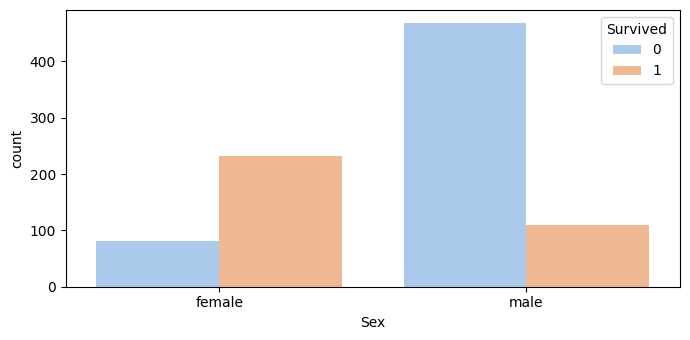

In [31]:
sns.countplot(cleaned_titanic_train, x='Sex', hue='Survived')
plt.show()

From the bar chart showing survival rates by gender, it can be observed that a larger proportion of male passengers perished, while a greater proportion of female passengers survived.

## Analyzing data

In the analysis step, we will utilize the cleaned data obtained above to perform a logistic regression analysis. The objective is to derive a mathematical model that can predict the survival status of Titanic passengers based on their various attributes following the shipwreck. We will first import the modules required for logistic regression.

In [32]:
import statsmodels.api as sm

In [33]:
lr_titanic_train = cleaned_titanic_train.copy()
lr_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Remove variables that are unlikely to affect the passenger survival probability.

In [34]:
lr_titanic_train = lr_titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
lr_titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


There are also categorical variables in the data, which cannot directly establish a logistic regression model. We need to introduce dummy variables, that is, use 0 and 1 to represent whether it belongs to the category.

In [35]:
lr_titanic_train=pd.get_dummies(lr_titanic_train,columns=["Pclass","Sex"],dtype=int,drop_first=True)
lr_titanic_train

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0,22.000000,1,0,7.2500,1,0,1,1
1,1,38.000000,1,0,71.2833,1,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0
3,1,35.000000,1,0,53.1000,1,0,0,0
4,0,35.000000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,0,0
888,0,29.699118,1,2,23.4500,3,0,1,0
889,1,26.000000,0,0,30.0000,0,0,0,1


Next, we need to separate the dependent variable and the independent variables. The dependent variable is the Survived variable, as the purpose of conducting logistic regression is to predict survival status based on other variables that may influence the passengers' survival probability.

In [36]:
y = lr_titanic_train['Survived']

In [37]:
X=lr_titanic_train.drop(['Survived'],axis=1)
X.head()

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,22.0,1,0,7.2500,1,0,1,1
1,38.0,1,0,71.2833,1,0,0,0
2,26.0,0,0,7.9250,0,0,1,0
3,35.0,1,0,53.1000,1,0,0,0
4,35.0,0,0,8.0500,0,0,1,1


We can first include all variables except Survived as independent variables, but we need to examine the correlations between them. If some of these variables have very high correlations, it will lead to multicollinearity.

In [38]:
X.corr().abs()

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,1.000000,0.232625,0.179191,0.091566,0.248512,0.006589,0.281004,0.084153
SibSp,0.232625,1.000000,0.414838,0.159651,0.890712,0.055932,0.092548,0.114631
Parch,0.179191,0.414838,1.000000,0.216225,0.783111,0.000734,0.015790,0.245489
Fare,0.091566,0.159651,0.216225,1.000000,0.217138,0.118557,0.413333,0.182333
FamilyNum,0.248512,0.890712,0.783111,0.217138,1.000000,0.038594,0.071142,0.200988
Pclass_2,0.006589,0.055932,0.000734,0.118557,0.038594,1.000000,0.565210,0.064746
Pclass_3,0.281004,0.092548,0.015790,0.413333,0.071142,0.565210,1.000000,0.137143
Sex_male,0.084153,0.114631,0.245489,0.182333,0.200988,0.064746,0.137143,1.000000


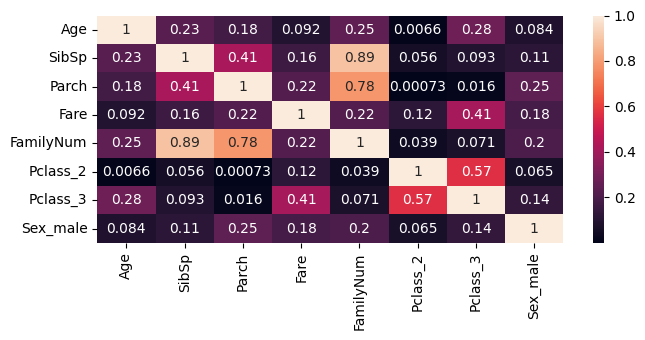

In [39]:
sns.heatmap(X.corr().abs(),annot=True)
plt.show()

From the above output, the absolute value of the correlation coefficient between SibSp and FamilyNum is greater than 0.8. This is expected because FamilyNum is calculated based on SibSp and Parch. If the correlation between different variables is too high, it will cause numerical optimization algorithms to fail to converge and thus be unable to obtain the calculation results of the logistic regression model parameters. Therefore, we need to remove either FamilyNum or SibSp. Since we are interested in whether the number of family members in the same household affects the survival probability, we retain FamilyNum. In addition, if we carefully examine the correlation coefficient values, we will find that there is also a strong correlation between Parch and FamilyNum, with a correlation coefficient of 0.78, close to 0.8. Therefore, we also remove Parch to avoid the algorithm from failing to converge.

In [40]:
X = X.drop(['Parch', 'SibSp'], axis=1)

Next, add an intercept to the model's linear equation.

In [41]:
X=sm.add_constant(X)
X

,const,Age,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,1.0,22.000000,7.2500,1,0,1,1
1,1.0,38.000000,71.2833,1,0,0,0
2,1.0,26.000000,7.9250,0,0,1,0
3,1.0,35.000000,53.1000,1,0,0,0
4,1.0,35.000000,8.0500,0,0,1,1
...,...,...,...,...,...,...,...
886,1.0,27.000000,13.0000,0,1,0,1
887,1.0,19.000000,30.0000,0,0,0,0
888,1.0,29.699118,23.4500,3,0,1,0
889,1.0,26.000000,30.0000,0,0,0,1


The next step is to call the Logit function and use maximum likelihood optimization to obtain the parameter values of the logistic regression model, then output summary information.

In [42]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Mon, 29 Sep 2025   Pseudo R-squ.:                  0.3339
Time:                        22:08:47   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
==============================================================================
"""

When the significance level is set to 0.05, the P-value of the above results indicates that the model considers the price of ship tickets to have no significant impact on the survival probability of passengers. Therefore, this variable can be removed, and a logistic regression model can be re-established.

In [43]:
X = X.drop(['Fare'], axis=1)
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Sep 2025   Pseudo R-squ.:                  0.3323
Time:                        22:08:47   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

In [44]:
np.exp(-0.0395)

np.float64(0.9612699539905982)

The above results indicate that for each additional year of age, the survival probability decreases by approximately 4%.

In [45]:
np.exp(-0.2186)

np.float64(0.803643111115195)

The above results indicate that for each additional family member traveling together, the probability of survival decreases by approximately 20%.

In [46]:
np.exp(-1.1798)

np.float64(0.30734020049483596)

The above results indicate that the survival probability of second-class passengers was approximately 71% lower than that of first-class passengers.

In [47]:
np.exp(-2.3458)

np.float64(0.09577055503172162)

The above results indicate that the survival probability of third-class passengers is approximately 90% lower than that of first-class passengers.

In [48]:
np.exp(-2.7854)

np.float64(0.061704402333015156)

The above results indicate that the survival probability of male passengers is approximately 94% lower than that of female passengers.

Based on the model parameter values, we summarize as follows: 
Passengers with younger age have a higher survival probability; 
female passengers have a higher survival rate than male passengers; 
passengers from higher cabin classes have a higher survival probability; 
passengers with fewer family members traveling together have a higher survival probability.

After obtaining the model, we will use it to predict the survival status of passengers on the Titanic in the titanic_test.csv file. 
First, we will read the data from titanic_test.csv.

In [49]:
titanic_test = pd.read_csv("titanic_test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


There are missing values in age, which need to be supplemented

In [51]:
titanic_test["Age"]=titanic_test["Age"].fillna(titanic_test["Age"].mean())

In [52]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


The next step is to introduce dummy variables for categorical variables in the model. However, before introducing them, we first need to convert the data type of the categorical variable to Category, and use the categories parameter to inform the program of all possible category values. The reason for doing this is that the prediction data may not contain all categories. We need to ensure that when introducing dummy variables, no category or certain categories are omitted.

In [53]:
titanic_test['Pclass'] = pd.Categorical(titanic_test['Pclass'], categories=['1', '2', '3'])
titanic_test['Sex'] = pd.Categorical(titanic_test['Sex'], categories=['female', 'male'])
titanic_test['Embarked'] = pd.Categorical(titanic_test['Embarked'], categories=['C', 'Q', 'S'])

In [54]:
titanic_test=pd.get_dummies(titanic_test,columns=['Pclass','Sex'],dtype=int,drop_first=True)
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0


In [55]:
model.params

const        4.061982
Age         -0.039495
FamilyNum   -0.218627
Pclass_2    -1.179763
Pclass_3    -2.345823
Sex_male    -2.785398
dtype: float64

Since we established the FamilyNum variable during the data organization step, this variable also needs to be added to the prediction data here.

In [56]:
titanic_test['FamilyNum'] = titanic_test['SibSp'] + titanic_test['Parch']
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male,FamilyNum
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0,2


In [57]:
X_test = titanic_test[['Age', 'FamilyNum', 'Pclass_2', 'Pclass_3', 'Sex_male']]
X_test = sm.add_constant(X_test)
X_test.head()

,const,Age,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,1.0,34.5,0,0,0,1
1,1.0,47.0,1,0,0,0
2,1.0,62.0,0,0,0,1
3,1.0,27.0,0,0,0,1
4,1.0,22.0,2,0,0,0


The `predict` method of the logistic regression model can now be called to obtain the predicted survival probability.

In [58]:
predicted_value = model.predict(X_test)
predicted_value

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

We have obtained the survival probabilities of Titanic passengers from the titanic_test.csv file predicted by the logistic regression model. We can predict survival for passengers with a probability greater than or equal to 0.5 and non-survival (death) for those with a probability less than 0.5, and output this final prediction result.

In [59]:
predicted_value > 0.5

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool

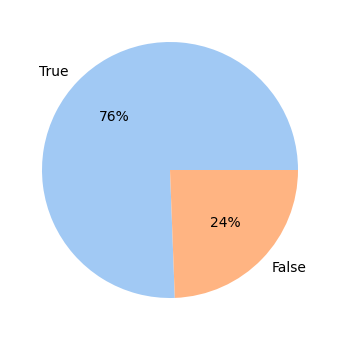

In [60]:
pred_series = pd.Series(predicted_value)
counts = (pred_series > 0.5).value_counts()
counts
plt.pie(counts,autopct="%.0f%%",labels=counts.index)
plt.show()

The survival probability of the test sample is approximately three-quarters.